In [1]:
import pandas as pd

In [2]:
Salary=pd.read_csv("C:\\Users\\chann\\Downloads\\Salary_Data (1).csv")

In [3]:
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearsExperience   30 non-null     float64
 1   Salary            30 non-null     float64
 2   Predicted_Values  30 non-null     float64
 3   Error             30 non-null     float64
 4   Error_squared     30 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


<AxesSubplot:xlabel='Salary', ylabel='Density'>

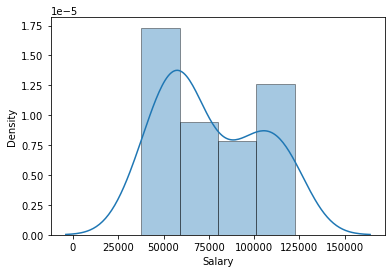

In [57]:
import seaborn as sns
sns.distplot(Salary['Salary'],hist_kws={'edgecolor': 'black'})

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

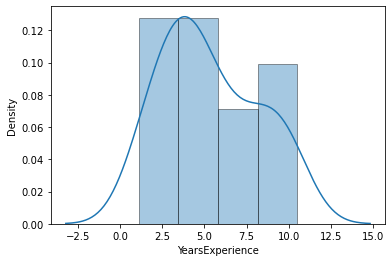

In [58]:
sns.distplot(Salary['YearsExperience'],hist_kws={'edgecolor': 'black'})

In [59]:
Salary.corr()

,YearsExperience,Salary,Predicted_Values,Error,Error_squared
YearsExperience,1.000000e+00,0.978242,1.000000e+00,-3.886017e-16,-0.115333
Salary,9.782416e-01,1.000000,9.782416e-01,2.074689e-01,-0.042502
Predicted_Values,1.000000e+00,0.978242,1.000000e+00,-3.907712e-16,-0.115333
Error,-3.886017e-16,0.207469,-3.907712e-16,1.000000e+00,0.338953
Error_squared,-1.153333e-01,-0.042502,-1.153333e-01,3.389533e-01,1.000000


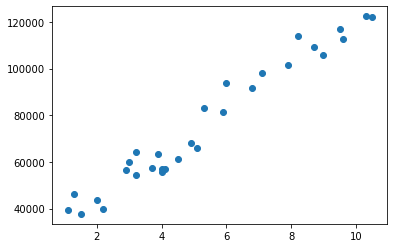

In [60]:
import matplotlib.pyplot as plt
plt.scatter(Salary['YearsExperience'],Salary['Salary'])

Here from above results we found that Salary and YearsExperience is highly correlated and the scatter plot showing a linear relation ship.

Creating the Model

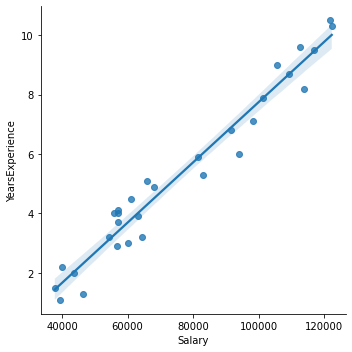

In [61]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=Salary).fit()
import seaborn as sns
sns.lmplot(x='Salary',y="YearsExperience",data=Salary)

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

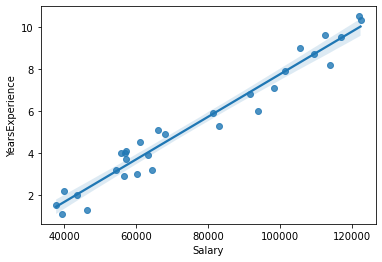

In [62]:
sns.regplot(x='Salary',y="YearsExperience",data=Salary)

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        13:59:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [66]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [67]:

'''Since p-value is less then 0.05 for 'YearsExperience' variable, 
we can say that it is a significant variable in predicting the dependent variable 'Salary' '''

"Since p-value is less then 0.05 for 'YearsExperience' variable, \nwe can say that it is a significant variable in predicting the dependent variable 'Salary' "

In [68]:
#95.695 of variation in the dependent variable is explained by the given independent variable

In [69]:
Salary['Predicted_Values']=model.fittedvalues
Salary['Error']=model.resid
Salary['Error_squared']=Salary['Error']**2
Salary

,YearsExperience,Salary,Predicted_Values,Error,Error_squared
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07


In [70]:
import numpy as np
RMSE=np.sqrt((model.resid**2).mean())
RMSE

5592.043608760661

# Predicted Values

In [71]:
newdata=pd.Series([20,22.1])
newdata

0    20.0
1    22.1
dtype: float64

In [72]:
newspredicted=pd.DataFrame(newdata,columns=['YearsExperience'])
newspredicted

,YearsExperience
0,20.0
1,22.1


In [73]:
model.predict(newspredicted)

0    214791.446628
1    234636.367503
dtype: float64

In [74]:
newspredicted['Salary_Predicted']=model.predict(newspredicted)
newspredicted

,YearsExperience,Salary_Predicted
0,20.0,214791.446628
1,22.1,234636.367503


# Logarithmic Transformations

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

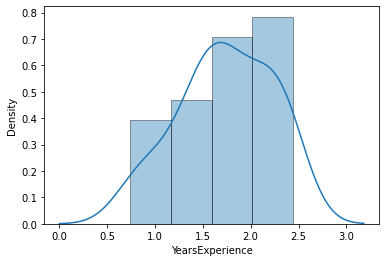

In [75]:
Log_exp = np.log1p(Salary['YearsExperience'])
sns.distplot(Log_exp,hist_kws={'edgecolor': 'black'})

<AxesSubplot:xlabel='Salary', ylabel='Density'>

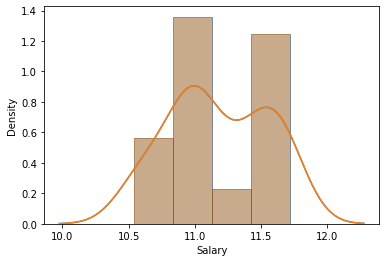

In [76]:
Log_salary=np.log1p(Salary['Salary'])
sns.distplot(Log_salary,hist_kws={'edgecolor': 'black'})
sns.distplot(Log_salary)

In [77]:
model_log=smf.ols('Log_exp~Log_salary',data=Salary).fit()
RMSE_Log=np.sqrt((model_log.resid**2).mean())
RMSE_Log

0.1265261690018763

# SQUARE ROOT TRANSFORMATION

<AxesSubplot:xlabel='Salary', ylabel='Density'>

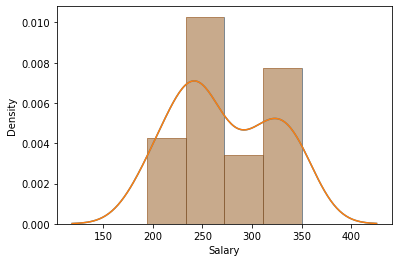

In [78]:
import numpy as np
Sqrt_SALARY=np.sqrt(Salary['Salary'])
sns.distplot(Sqrt_SALARY,hist_kws={'edgecolor': 'black'})
sns.distplot(Sqrt_SALARY)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

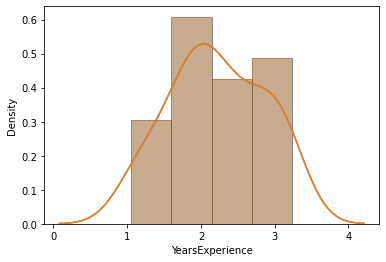

In [79]:
Sqrt_YE=np.sqrt(Salary['YearsExperience'])
sns.distplot(Sqrt_YE,hist_kws={'edgecolor': 'black'})
sns.distplot(Sqrt_YE)

In [80]:
model_sqrt=smf.ols('Sqrt_YE~Sqrt_SALARY',data=Salary).fit()
RMSE_SQRT=np.sqrt((model_sqrt.resid**2).mean())
RMSE_SQRT

0.15098793085865866

# Square Transformations

Text(0.5, 0, 'Squared Salary')

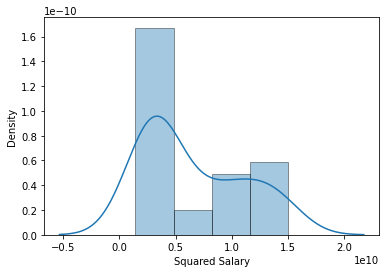

In [81]:
Sqr_SALARY = (Salary['Salary'])**2
sns.distplot(Sqr_SALARY, hist_kws={'edgecolor': 'black'})
plt.xlabel('Squared Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

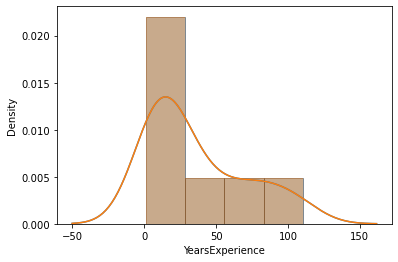

In [82]:
Sqr_YE=(Salary['YearsExperience'])**2
sns.distplot(Sqr_YE, hist_kws={'edgecolor': 'black'})
sns.distplot(Sqr_YE)

In [83]:
model_sqr=smf.ols('Sqr_YE~Sqr_SALARY',data=Salary).fit()
RMSE_SQR=np.sqrt((model_sqr.resid**2).mean())
RMSE_SQR

7.117486572354785